# TP3 : Traitement de l'image
Date : 16/10/2023\
Auteur : Matteo Couchoud

## I. Librairies

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL as pil
import random as rd

## II. Calcul de l'histogramme

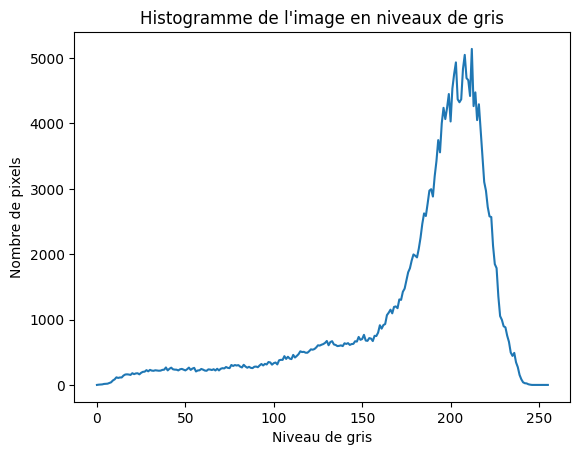

In [51]:
#Import de l'image pepper.bmp
img = pil.Image.open("banana.jpeg")

#Conversion de l'image en niveau de gris
img = img.convert('L')
#display(img)

#Création de l'histogramme de l'image en niveaux de gris


def histogramme(img):
    hist = np.zeros(256)
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            hist[img.getpixel((i,j))] += 1
    return hist

hist = histogramme(img)

#Affichage de l'histogramme
plt.figure()
plt.plot(hist)
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Niveau de gris")
plt.ylabel("Nombre de pixels")
plt.show()


## III. Algorithme de seuillage

144
145
145
Le seuil optimal est :  145
La moyenne des intensités à gauche est :  93.43900759628626
La moyenne des intensités à droite est :  198.25097653492466


array([[197, 197, 199, ...,  77,  79,  81],
       [196, 197, 197, ..., 114, 120, 125],
       [194, 194, 196, ..., 152, 156, 158],
       ...,
       [ 80,  78,  69, ..., 174, 176, 174],
       [ 82,  79,  70, ..., 172, 171, 166],
       [ 82,  79,  70, ..., 118, 112, 102]], dtype=uint8)

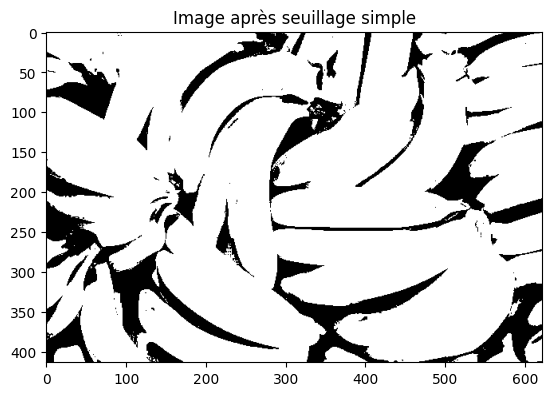

In [52]:
#Initialisation du seuil 
seuil=0
seuil_pre = 0
#Initialisation de la moyenne des intensités à gauche et à droite
M_gauche = 0
M_droite = 0
#Initialisation de la somme des intensités à gauche et à droite
S_gauche = 0
S_droite = 0




#On créé ici l'algorithme de seuillage de l'histogramme précédent
seuil = rd.randint(0,255)
#Tant que le seuil n'est pas constant, on continue à calculer la moyenne des intensités à gauche et à droite et à changer le seuil
while(seuil != seuil_pre):
    #Le seuil précédent est le seuil actuel
    seuil_pre = seuil

    #On remet à 0
    M_droite=0
    M_gauche=0
    S_gauche = 0
    S_droite = 0

    #On calcule la moyenne des intensités à gauche et à droite
    for i in range(seuil_pre):
        S_gauche += i*hist[i]
    M_gauche = S_gauche/sum(hist[:seuil_pre])

    for i in range(seuil_pre,255):
        S_droite += i*hist[i]
    M_droite = S_droite/sum(hist[seuil_pre:])

    #On calcule le nouveau seuil
    seuil = (int)(M_gauche + M_droite)//2
    print(seuil)

print("Le seuil optimal est : ", seuil)
print("La moyenne des intensités à gauche est : ", M_gauche)
print("La moyenne des intensités à droite est : ", M_droite)





#image en tant qu'array
img_array = np.array(img)
display(img_array)

#On applique le seuillage à l'image
for j in range(img.size[0]):
    for i in range(img.size[1]):
        if(img_array[i,j] > seuil):
            img_array[i,j] = 255
        else:
            img_array[i,j] = 0

#On affiche l'image après seuillage
plt.figure()
plt.imshow(img_array, cmap='gray')
plt.title("Image après seuillage simple")
plt.show()







    
    



## IV. Segmentation d'images grâce à l'algorithme des K-means

Les moyennes initiales sont :  [  1  52 149 206]
Les moyennes à la sortie de l'algorithme sont :  [ 30  93 156 221]


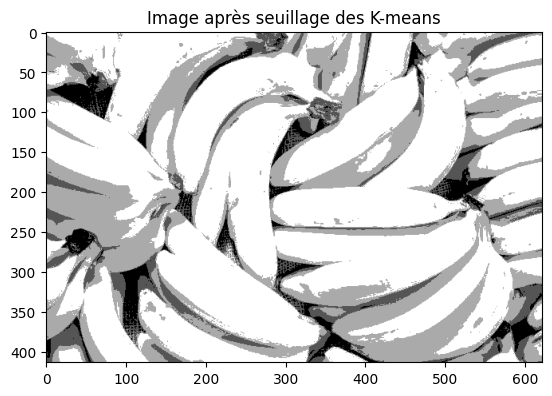

In [53]:
# Dans cette partie, nous réalisons un seuillage, mais avec la méthode des K-means.


# On définit K un entier, le nombre de classes que l'on souhaite avoir.
# K peut être changé par l'utilisateur à sa guise.
K = 8
img_array = np.array(img)

# On choisit de manière aléatoire les moyennes des K classes, que l'on range dans un vecteur par ordre croissant.
# On utilise la fonction randint de la librairie random pour générer des nombres aléatoires.

moyennes = np.sort(np.random.randint(0, 255, K))
print("Les moyennes initiales sont : ", moyennes)

# On initialise un vecteur classes dans lequel on mettra la classe de chaque intensité de 0 à 255
classes = np.zeros(255)
# On initialise un vecteur distances qui permettra de calculer les distances aux moyennes
distances = np.zeros(K)
# Le vecteur epsilon permet de s'assurer de la convergence de l'algorithme
epsilon = np.ones(K)

while(max(np.abs(i) for i in epsilon)>0.5):
    for i in range(255):
        for k in range(K):
            distances[k]=np.abs(i-moyennes[k])
        classes[i]=np.argmin(distances)
    for k in range(K):
        epsilon[k]=moyennes[k]-np.mean([i for i, x in enumerate(classes) if x == k])
        moyennes[k]=np.mean([i for i, x in enumerate(classes) if x == k])
print("Les moyennes à la sortie de l'algorithme sont : ", moyennes)

# On affecte à chaque pixel la moyenne de la classe qui lui correspond
for j in range(img.size[0]):
    for i in range(img.size[1]):
        img_array[i,j]=classes[img_array[i,j]]

plt.figure()
plt.imshow(img_array, cmap='gray')
plt.title("Image après seuillage des K-means")
plt.show()